# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 31.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "rethinaduraisj"
kaggle_key = "f533c759f6b84b373c7bc03930fa4eb3"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

100% 189k/189k [00:00<00:00, 424kB/s]
100% 189k/189k [00:00<00:00, 423kB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train = train.drop('casual', axis=1)

In [8]:
train = train.drop('registered', axis=1)

In [9]:
train["datetime"]=pd.to_datetime(train["datetime"])

In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test["datetime"]=pd.to_datetime(test["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train, time_limit=600, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221228_035727/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221228_035727/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12210.18 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note

KeyboardInterrupt: ignored

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.109959      18.317078  558.420917                0.001603           0.553841            3       True         14
1   RandomForestMSE_BAG_L2  -53.431890      13.282965  412.461576                0.764616          29.314505            2       True         12
2          LightGBM_BAG_L2  -55.035680      13.016691  412.660578                0.498343          29.513508            2       True         11
3          CatBoost_BAG_L2  -56.003877      12.687824  427.685627                0.169475          44.538556            2       True         13
4        LightGBMXT_BAG_L2  -60.370184      16.883042  454.500507                4.364693          71.353436            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.047710    0.045261         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    23.358217
1    41.972752
2    45.887352
3    49.803349
4    51.955547
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.752563
std        89.666618
min         3.069366
25%        20.069902
50%        64.100052
75%       167.219009
max       366.163910
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
sum(n < 0 for n in predictions.values.flatten())

0

In [ ]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 206kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2022-12-22 07:02:43  first raw submission  complete  1.80014      1.80014       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3132f49610>,
      dtype=object)

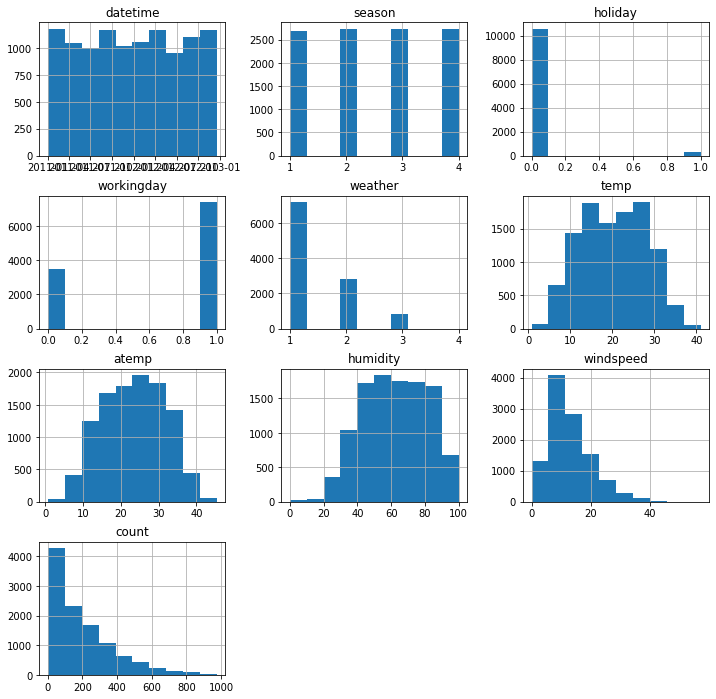

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(12,12))

In [11]:
# create a new feature
train["day"] = train["datetime"].dt.day
test["day"] = test["datetime"].dt.day

train["month"] = train["datetime"].dt.month
test["month"] = test["datetime"].dt.month

train["year"] = train["datetime"].dt.year
test["year"] = test["datetime"].dt.year

train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour

In [12]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,year,hour
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19,12,2012,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,19,12,2012,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,19,12,2012,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,19,12,2012,22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,88,19,12,2012,23


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [13]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  day         10886 non-null  int64         
 11  month       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  hour        10886 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(8)
memory usage: 1.0 MB


In [ ]:
# View are new feature
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,year,hour
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19,12,2012,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,19,12,2012,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,19,12,2012,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,19,12,2012,22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,88,19,12,2012,23


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3132a9f130>,
      dtype=object)

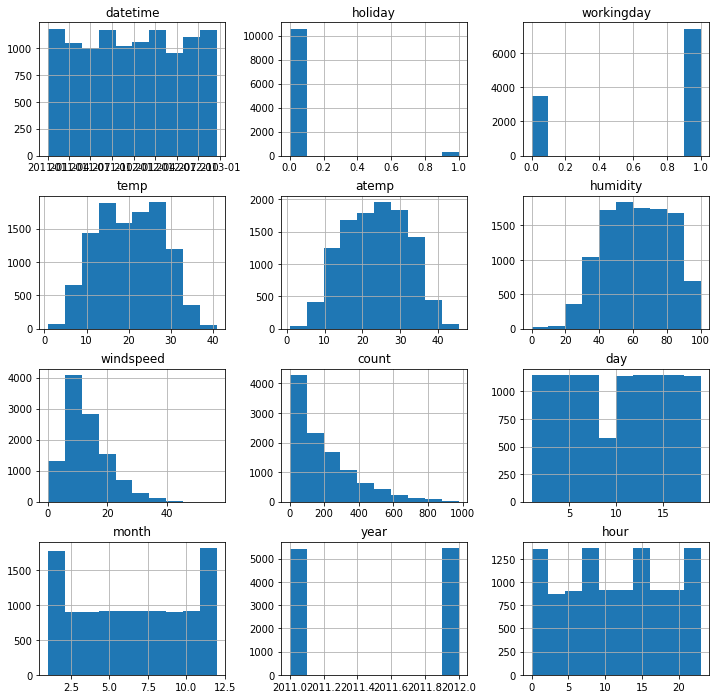

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(12,12))

In [43]:
#correlation matrix
train.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,count,day,month,year,hour
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,-0.005393,-0.015877,0.001731,0.012021,-0.000354
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,0.011594,0.009829,-0.003394,-0.002482,0.002780
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.015551,0.257589,0.061226,0.145430
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.011866,0.264173,0.058540,0.140343
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.011335,0.204537,-0.078606,-0.278011
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.101369,0.036157,-0.150192,-0.015221,0.146631
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,1.000000,0.019826,0.166862,0.260403,0.400601
day,-0.015877,0.009829,0.015551,0.011866,-0.011335,0.036157,0.019826,1.000000,0.001974,0.001800,0.001132
month,0.001731,-0.003394,0.257589,0.264173,0.204537,-0.150192,0.166862,0.001974,1.000000,-0.004932,-0.006818
year,0.012021,-0.002482,0.061226,0.058540,-0.078606,-0.015221,0.260403,0.001800,-0.004932,1.000000,-0.004234


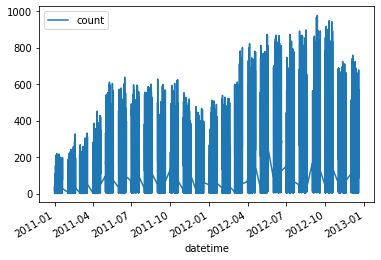

In [47]:
#bike demand evolution
train.plot("datetime","count")

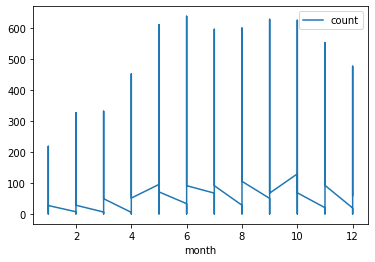

In [68]:
#bike demand evolution monthly 2011Y
train[train.year==2011].plot(x="month",y="count",)

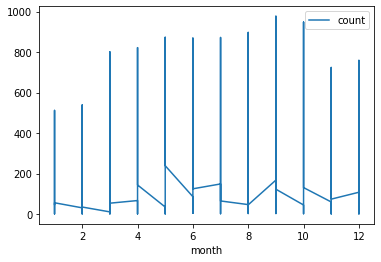

In [67]:
#bike demand evolution monthly 2012Y
train[train.year==2012].plot(x="month",y="count")

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train, time_limit=600, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221222_145915/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221222_145915/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11564.43 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Not

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.406158      18.732125  565.882731                0.001340           0.363033            3       True         14
1          LightGBM_BAG_L2  -30.672815      16.770857  435.002951                0.356639          33.257779            2       True         11
2          CatBoost_BAG_L2  -30.870852      16.601074  461.366352                0.186855          59.621181            2       True         13
3        LightGBMXT_BAG_L2  -31.363830      17.438860  437.742588                1.024641          35.997416            2       True         10
4   RandomForestMSE_BAG_L2  -31.619210      17.162649  436.643322                0.748431          34.898150            2       True         12
5      WeightedEnsemble_L2  -32.138741      15.120193  359.190915         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.38702114834055,
  'LightGBM_BAG_L1': -33.91733776595802,
  'RandomForestMSE_BAG_L1': -38.380

In [ ]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    16.401878
1    11.047426
2    10.272551
3     9.231811
4     8.183758
Name: count, dtype: float32

In [ ]:
sum(n < 0 for n in predictions_new_features.values.flatten())

0

In [ ]:
submission_new_features = pd.read_csv("sampleSubmission.csv")
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:03<00:00, 60.2kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2022-12-22 15:15:42  new features          complete  0.64732      0.64732       
submission.csv               2022-12-22 07:02:43  first raw submission  complete  1.80014      1.80014       


New Score of `0.64732`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [29]:
predictor_new_hpo = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train,num_gpus=1,time_limit=600, num_bag_folds=2, num_bag_sets=1, num_stack_levels=3, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221229_085223/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=2, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221229_085223/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11654.42 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note

In [30]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -31.490541      11.013564  343.486627                0.000789           0.364502            3       True         14
1      WeightedEnsemble_L4  -31.805362      13.096624  452.668988                0.001015           0.695664            4       True         22
2          LightGBM_BAG_L2  -32.158077       7.768369  222.282520                0.288916           3.038737            2       True          9
3          CatBoost_BAG_L3  -32.176387      11.278566  378.943502                0.034459          21.748844            3       True         18
4     ExtraTreesMSE_BAG_L3  -32.195532      11.875780  366.013219                0.631673           8.818562            3       True         19
5      WeightedEnsemble_L5  -32.244828      14.644859  510.501371         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L3': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L3': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L3': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L3': '

In [31]:
predictions_hpo = predictor_new_hpo.predict(test)
predictions_hpo.head()

0    17.045513
1    11.393410
2     9.331726
3     7.929997
4     7.117903
Name: count, dtype: float32

In [32]:
submission_hpo = pd.read_csv("sampleSubmission.csv")
submission_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [33]:
# Remember to set all negative values to zero
sum(n < 0 for n in predictions_hpo.values.flatten())

0

In [ ]:
predictions_hpo[predictions_hpo < 0] = 0

In [ ]:
sum(n < 0 for n in predictions_hpo.values.flatten())

0

In [34]:
# Same submitting predictions
submission_hpo["count"] = predictions_hpo
submission_hpo.to_csv("submission_new_hpo.csv", index=False)

In [35]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters(1,1,3)"

100% 188k/188k [00:02<00:00, 76.9kB/s]
Successfully submitted to Bike Sharing Demand

In [36]:
!kaggle competitions submissions -c bike-sharing-demand

fileName                     date                 description                               status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-12-29 09:05:14  new features with hyperparameters(1,1,3)  complete  0.64038      0.64038       
submission_new_hpo.csv       2022-12-29 08:50:02  new features with hyperparameters(3,1,3)  complete  0.62255      0.62255       
submission_new_hpo.csv       2022-12-28 06:40:30  new features with hyperparameters(9,5,3)  complete  0.74931      0.74931       
submission_new_hpo.csv       2022-12-28 06:39:11  new features with hyperparameters(5,1,1)  complete  0.74931      0.74931       
submission_new_hpo.csv       2022-12-23 16:03:13  new features with hyperparameters(5,1,1)  complete  0.68468      0.68468       
submission_new_hpo.csv       2022-12-23 15:37:43  new features with hyperparameters(7,1,3)

New Score of `0.62255`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

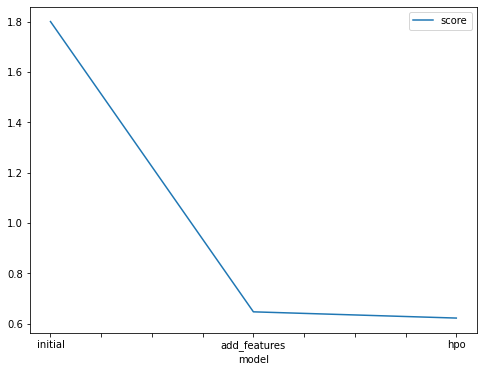

In [39]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.80014, 0.64732, 0.62255]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

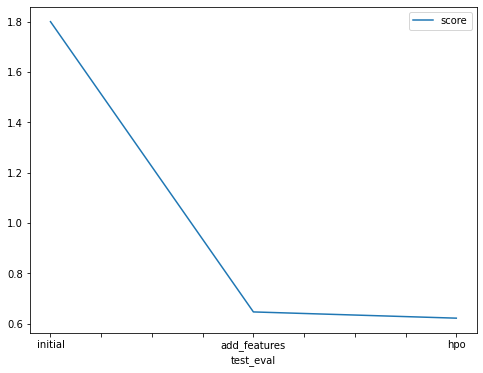

In [40]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80014, 0.64732, 0.62255]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [71]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "model_used" : "WeightedEnsemble_L3",
    "num_bag_folds": [5, 1, 3],
    "num_bag_sets": [1, 1, 1],
    "num_stack_levels": [3, 3, 3],
    "score": [0.67858, 0.64037, 0.62255]
})

,model,model_used,num_bag_folds,num_bag_sets,num_stack_levels,score
0,initial,WeightedEnsemble_L3,5,1,3,0.67858
1,add_features,WeightedEnsemble_L3,1,1,3,0.64037
2,hpo,WeightedEnsemble_L3,3,1,3,0.62255
